In [4]:
#Load all packages and libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
#Load dataset
diabetes = datasets.load_diabetes()

In [6]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [7]:
# Show feature names
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [8]:
# Create Feature and Target variables
X = diabetes.data
y = diabetes.target
print("dimension of X:", X.shape)
print("dimension of y:", y.shape)

dimension of X: (442, 10)
dimension of y: (442,)


In [9]:
# Split data into testing & training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Dimensions of training data and testing data
print("feature training data:", X_train.shape, "/ target training data:", y_train.shape)
print("feature testing data:", X_test.shape, "/ target testing data:" , y_test.shape)
print("scaled feature training data:", X_train_scaled.shape)
print("scaled feature test data:", X_test_scaled.shape)

feature training data: (353, 10) / target training data: (353,)
feature testing data: (89, 10) / target testing data: (89,)
scaled feature training data: (353, 10)
scaled feature test data: (89, 10)


In [12]:
#BUILDING LINEAR REGRESSION MODEL
# 1. defining the model
model = LinearRegression()

In [13]:
# 2. build training model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
import joblib

# Save the model to a file
joblib.dump(model, "diabetes_LGmodel.pkl")

['diabetes_LGmodel.pkl']

In [15]:
# Applying training model to testing dataset
Y_pred = model.predict(X_test_scaled)
print(Y_pred)

[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.63167076 105.59678023 130.70432536
 202.18534537 171.13039501 164.91423047 124.72472569 144.81030894
 181.99635452 199.41369642 234.21436188 145.95665512  79.86703276
 157.369412

In [16]:
# PREDICTION RESULTS
# PRINT MODEL PERFORMANCE
print("Parameters:", model.coef_)       #coefficients of feature varibales(diabetes.feature_names)
print("Intercept:", model.intercept_)
print("MSE: %.2f"
      % mean_squared_error(y_test, Y_pred)) 
print("Coefficient of determination:%.2f"
      % r2_score(y_test, Y_pred))

Parameters: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Intercept: 153.73654390934846
MSE: 2900.19
Coefficient of determination:0.45


# Each model coeffecient is multiplied by its corresponding feature variable 
# The sum of all products of model coef and features should produce the value of model intercept. EG:
# Y^ = model.coef_[0]*feature_names[0] +  model.coef_[1]*feature_names[1] +  model.coef_[2]*feature_names[2]...
# model.coef_[10]*feature_names[10] = model.intercept_

In [17]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [18]:
Y_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [100]:
# VISUALIZATIONS - SCATTERPLOTS
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

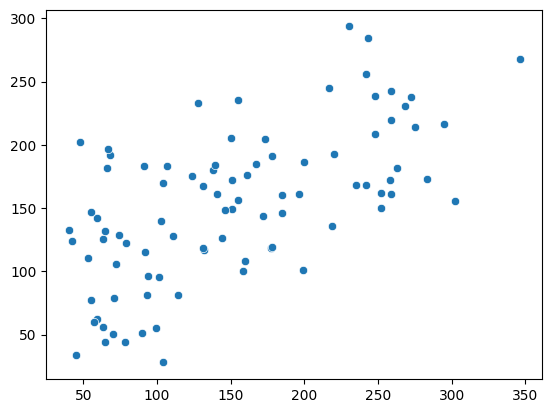

In [101]:
# # first look at data points on the plot
sns.scatterplot(x=y_test,y=Y_pred, )

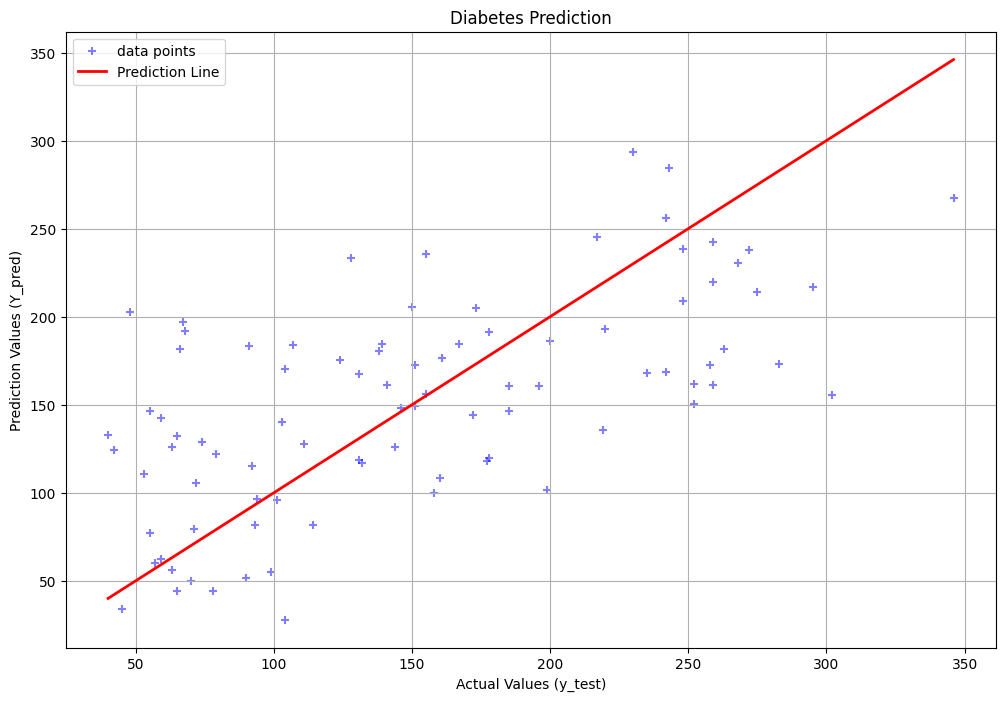

In [102]:
# FINAL & MAIN SCATTERPLOT WITH REGRESSION/PREDICTION LINE
plt.figure(figsize = (12, 8))
plt.scatter(y_test, Y_pred, marker ='+', alpha =0.5, color='blue', label = 'data points')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r-',
         lw = 2,
         label = 'Prediction Line')
plt.title('Diabetes Prediction')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Prediction Values (Y_pred)')
plt.legend()
plt.grid(True)
plt.savefig("Diabetes Prediction(scaled)", dpi=300, bbox_inches = 'tight')
plt.show()

In [19]:
# CREATING POLYNOMIAL FEATURES
from sklearn.preprocessing import PolynomialFeatures

In [20]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

In [22]:
# Transform  X into X_poly with new features
X_poly = poly.fit_transform(X_scaled)


In [23]:
# Split data into training and testing

X_poly_train, X_poly_test, y_train, y_test =  train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [24]:
# Ridge Regression
model = Ridge(alpha=10.0)
model.fit(X_poly_train, y_train)

Ridge(alpha=10.0)

In [25]:
import joblib

# Save the model to a file
joblib.dump(model, 'ridge_regression_model.pkl')

['ridge_regression_model.pkl']

In [ ]:
# # Training Linear Regression model on the training set
# model = LinearRegression()
# model.fit(X_poly_train, y_train)

LinearRegression()

In [26]:
# Predict on the test set and calculate R^2 
y_pred_test = model.predict(X_poly_test)
r2 = r2_score(y_test, y_pred_test)
mse_poly = mean_squared_error(y_test, y_pred_test)
print("MSE on test set:", mse_poly)
print("R2 score on test set:", r2)

MSE on test set: 2639.6749816804904
R2 score on test set: 0.5017743720874817


In [27]:
# Check R2 on training set to spot overfitting
y_train_pred = model.predict(X_poly_train)
r2_train = r2_score(y_train, y_train_pred)

print("r2 score on training set:" ,r2_train)

r2 score on training set: 0.5905474562213404


In [34]:
# EXAMPLE REAL WORLD USE CASE OF THE LINEAR REGRESSION MODEL

# Load the saved models
diabetes_LGmodel = joblib.load("diabetes_LGmodel.pkl")
ridge_regression_model = joblib.load("ridge_regression_model.pkl")

# Create a new patient data
# Patient data: [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]
patient_data = [[0.03807591, 0.05068012, 0.06169621, 0.02187235, -0.0442235,
                 -0.03482076, -0.04340085, -0.00259226, 0.01990749, -0.01764613]]

# Scale the patient data
scaled_data = scaler.transform(patient_data)

# Predict using Linear Regression
prediction_lr = diabetes_LGmodel.predict(scaled_data)[0]

# Display results
print(f"Linear Regression predicts a diabetes progression score of {prediction_lr:.2f}")


Linear Regression predicts a diabetes progression score of 213.24


In [35]:
# EXAMPLE REAL WORLD USE CASE OF THE LINEAR REGRESSION MODEL

# Transform patient data to polynomial features
patient_data_poly = poly.transform(scaled_data)

# Now predict using Ridge Regression
prediction_ridge = ridge_regression_model.predict(patient_data_poly)[0]

print(f"Ridge Regression predicts a diabetes progression score of {prediction_ridge:.2f}")

Ridge Regression predicts a diabetes progression score of 212.52
